In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [24]:
# definition of function where y_param have to manuallz defined and inserted 
def TSNE_maker(feat_df, y_param, colors, s,  subset_values=None):

    unique_categories = y_param.dropna().unique()
    Location_to_color = {Location: color for Location, color in zip(unique_categories, all_colors)}
    ideal_perplexity = math.sqrt(feat_df.shape[0])
    standarized_data = StandardScaler().fit_transform(feat_df)
    X_embedded = TSNE(n_components=2, perplexity=ideal_perplexity, n_jobs=-1, n_iter=1000,
                  learning_rate='auto', init='random', random_state=42).fit_transform(standarized_data)
    principalDf = pd.DataFrame(data = X_embedded
             , columns = ['principal component 1', 'principal component 2'])
    finalDf =  pd.concat([principalDf.reset_index(drop=True), pd.DataFrame(y_param).reset_index(drop=True)], 
                     axis=1, ignore_index=True,)
    l = list(principalDf.columns)
    l.append(y_param.name)
    finalDf.columns = l
    
    if subset_values is not None:
        finalDf = finalDf[finalDf[y_param.name].isin(subset_values)]

    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('TSNE', fontsize = 20)
    ax.grid(False)

    targets = finalDf[y_param.name].value_counts(dropna=False).index.to_list()
    colors = colors
   
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[y_param.name] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = s
                   )
    ax.legend(targets, loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.savefig('TSNE Clustering of Lymph Nodes.png')

In [3]:
# definition of the creation of the y_param - used in transp_TSNE_plot
def create_y_param(lesion, tumor_list, binary_tumor):
    if lesion == 0:
        y = feature_df[feature_df['lesion_type'] == 0]
    elif lesion == 1:
        y = feature_df[feature_df['lesion_type'] != 0]
    elif lesion == 2:
        y = feature_df
    else:
        y = feature_df 
        
    if y['tumour_type3_y'].isin(tumor_list).any():
        y_param = y[y['tumour_type3_y'].isin(tumor_list)]
        y_param = y_param.dropna(subset='tumour_type3_y')
        y_param = y_param['tumour_type3_y']
    else: 
        if binary_tumor == 'Lung':
            y_param = y['binary lung']
        elif binary_tumor == 'CRC':
            y_param = y['binary CRC']
        elif binary_tumor == 'Sarcoma':
            y_param = y['binary Sarcoma']
        elif binary_tumor == 'Melanoma':
            y_param = y['binary Melanoma']
        elif binary_tumor == 'Ovary':
            y_param = y['binary Ovary']
        elif binary_tumor == 'prim-mets':
            y_param = y['binary primary metastasis']
        else:
            raise ValueError("Invalid binary_tumor value.")
    return y_param

In [4]:
# definition of transp_TSNE_maker 
def transp_TSNE_maker(feat_df, lesion, tumor_list, binary_tumor, colors, s):
    
    numeric_columns = feat_df.select_dtypes(include=np.number)
    feat_df = feat_df[numeric_columns.columns]
    feat_df = feat_df.dropna()
    
    
    ideal_perplexity = math.sqrt(feat_df.shape[0])
    standarized_data = StandardScaler().fit_transform(feat_df)
    X_embedded = TSNE(n_components=2, perplexity=ideal_perplexity, n_jobs=-1, n_iter=1000,
                  learning_rate='auto', init='random', random_state=42).fit_transform(standarized_data)
    principalDf = pd.DataFrame(data = X_embedded
             , columns = ['principal component 1', 'principal component 2'])
    y_param = create_y_param(lesion, tumor_list, binary_tumor)
    principalDf.reset_index(drop=True, inplace=True)
    y_param.reset_index(drop=True, inplace=True)
    finalDf = pd.concat([principalDf, y_param], axis=1)

    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1) 
    ax.set_title('Megaste TSNE', fontsize = 20)
    ax.grid(False)
    targets = y_param.value_counts(dropna=False).index.to_list()
    colors = colors
   
    for target, color in zip(targets,colors):
        indicesToKeep = np.asarray(y_param==target).nonzero()
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = s
                   , label = target
                  )
    non_condition = np.asarray(y_param != targets[-1]).nonzero()
    ax.scatter(finalDf.loc[non_condition, 'principal component 1'],
               finalDf.loc[non_condition, 'principal component 2'],
               c="#FFFFFF00", 
               s=s,
               alpha=0) 

    ax.legend(targets, loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.savefig('TSNE Primary Tumor(0) vs. Metastasis(1).png')
   

In [5]:
colors = [
    '#00c853', # Green
    '#d50000', # Red
]
all_colors = [
    '#d50000', # Red
    '#00c853', # Green
    '#2962ff', # Blue
    '#ff6d00', # Orange
    '#3e2723', # Brown
    '#6200ea', # Deep Purple
    '#c51162', # Pink
    '#aeea00', # Lime
    '#aa00ff', # Purple
    '#2196f3', # Blue 2
    '#304ffe', # Indigo
    '#263238', # Blue Grey
    '#00b8d4', # Cyan
    '#ffab00', # Amber
    '#9e9e9e', # Grey 2
    '#ffc107', # Golden
    '#00bcd4', # Cyan 2
    '#00bfa5', # Teal
    '#ff6d00', # Orange
    '#dd2c00', # Deep Orange
    '#212121', # Grey
    '#9c27b0', # Purple 2
    '#ff5722', # Orange 2
    '#4caf50', # Green 2
    '#c51162', # Pink
    '#00bfa5', # Teal
    '#64dd17', # Light Green
    '#f44336', # Red 2
    '#795548', # Brown 2
    '#607d8b', # Blue Grey 2
    '#e91e63', # Pink 2
    '#0091ea', # Light Blue
]

nine_colors = [
    '#d50000', # Red
    '#00c853', # Green
    '#ff6d00', # Orange
    '#2962ff', # Blue
    '#3e2723', # Brown
    "#ffff00", # Yellow
    '#6200ea', # Deep Purple
    '#c51162', # Pink
    '#aeea00', # Lime

]

## Importing Datasets

In [6]:
feature_df = pd.read_csv(r"C:\Users\m.soliman\Downloads\Radiomics\20240401_Megaset_features_v0_original.csv", index_col=0)

## Pre-Processing

In [7]:
def classify_segment(segment):
   if segment.startswith('0'):
       return 'Primary'
   elif segment.startswith('1.3'):
       return 'Lymph Nodes'
   elif segment.startswith('1.1.05'):
       return 'Lung mets'
   elif segment.startswith('1.1.11'):
       return 'Liver mets'
   elif segment.startswith('1.4.03') or segment.startswith('1.4.04') or segment.startswith('1.1.16'):
       return 'Abdopelvis mets'
   elif segment.startswith('1.2'):
       return 'Bone mets'
   elif segment.startswith('1.1.01'):
       return 'Brain mets'
   elif segment.startswith('1.1.17'):
       return 'Adrenal mets'
   else:
       return 'Others'


In [8]:
lymph_mapping = {
   '3.01': 'Head and Neck',
   '3.02': 'Thoracic',
   '3.03': 'Thoracic',
   '3.04': 'Thoracic',
   '3.05': 'Thoracic',
   '3.06': 'Thoracic',
   '3.07': 'Thoracic',
   '3.08': 'Thoracic',
   '3.09': 'Thoracic',
   '3.10': 'Thoracic',
   '3.11': 'Thoracic',
   '3.12': 'Thoracic',
   '3.13': 'Thoracic',
   '3.14': 'Thoracic',
   '3.15': 'Abdominal',
   '3.16': 'Abdominal',
   '3.19': 'Abdominal',
   '3.17': 'Pelvic',
   '3.18': 'Pelvic',
   '3.20': 'Abdominal', 
   '3.21': 'Thoracic',
   '3.22': 'Abdominal'
}


In [9]:
feature_df.index.name=None
feature_df['lesion_type'] = feature_df['Segment Name'].apply(lambda x: '.'.join(x.split('.')[:3]))
categories = ['CRC', 'Melanoma', 'Lung', 'Pancreas', 'Kidney', 'Liver']
feature_df['categories']= feature_df['tumtype'].apply(lambda x: x if x in categories else 'none')
one_hot_encoded_df = pd.get_dummies(feature_df['categories'], prefix='tumtype').astype(int)
names = {
    'tumtype_CRC':'binary CRC',
    'tumtype_Pancreas':'binary Pancreas',
    'tumtype_Melanoma':'binary Melanoma',
    'tumtype_Kidney':'binary Kidney',
    'tumtype_Lung':'binary lung',
    'tumtype_Liver': 'binary liver'}
one_hot_encoded_df.rename(columns=names, inplace=True)
one_hot_encoded_df = one_hot_encoded_df.drop('tumtype_none', axis=1)
feature_df = pd.concat([feature_df, one_hot_encoded_df], axis=1)
feature_df = feature_df.rename(columns={'tumtype': 'tumour_type3_y'})
feature_df = feature_df.drop('categories', axis=1)
feature_df['binary primary metastasis'] = feature_df['Segment Name'].apply(lambda x: 0 if x.startswith('0') else 1)
feature_df['binary primary tumor'] = feature_df['Segment Name'].str.startswith('0').astype(int)
feature_df['lesion_type_metastatis'] = feature_df['Segment Name'].apply(lambda x: '0' if x.startswith('0') else '.'.join(x.split('.')[1:3]))
feature_df['lesion_place'] = feature_df['Segment Name'].apply(lambda x:'.'.join(x.split('.')[1:3]))
feature_df['binary primary lung'] = np.where((feature_df['binary lung'] == 1) & (feature_df['binary primary tumor'] == 0), 1, np.where((feature_df['binary lung'] == 1) & (feature_df['binary primary tumor'] == 1), 0, 2))
feature_df['binary primary liver'] = np.where((feature_df['binary liver'] == 1) & (feature_df['binary primary tumor'] == 0), 1, np.where((feature_df['binary liver'] == 1) & (feature_df['binary primary tumor'] == 1), 0, 2))
feature_df['binary primary CRC'] = np.where((feature_df['binary CRC'] == 1) & (feature_df['binary primary tumor'] == 0), 1, np.where((feature_df['binary CRC'] == 1) & (feature_df['binary primary tumor'] == 1), 0, 2))
feature_df['lesion space'] = feature_df['Segment Name'].str.split('.').str[1]
feature_df['Location'] = feature_df['Segment Name'].apply(classify_segment)
feature_df['Lymph_type'] = np.where(feature_df['Location'] == 'Lymph Nodes', feature_df['lesion_place'].map(lymph_mapping), np.nan)
feature_df

,Project,Case,tumour_type3_y,Segment ID,Segment Name,Segment index,Label,Label_channel,Dimensionality,Image,...,binary primary metastasis,binary primary tumor,lesion_type_metastatis,lesion_place,binary primary lung,binary primary liver,binary primary CRC,lesion space,Location,Lymph_type
0,(HCC-TACE-Seg),HCC_001,Liver,Segment_1,0.1.11.1,0,1,0,3D,X:\External imaging data\Francesco_segmentatio...,...,0,1,0,1.11,2,0,2,1,Primary,NaN
1,(HCC-TACE-Seg),HCC_002,Liver,Segment_1,0.1.11.1,0,1,0,3D,X:\External imaging data\Francesco_segmentatio...,...,0,1,0,1.11,2,0,2,1,Primary,NaN
2,(HCC-TACE-Seg),HCC_002,Liver,Segment_2,0.1.11.2,1,2,0,3D,X:\External imaging data\Francesco_segmentatio...,...,0,1,0,1.11,2,0,2,1,Primary,NaN
3,(HCC-TACE-Seg),HCC_002,Liver,Segment_3,1.3.15.1,2,3,0,3D,X:\External imaging data\Francesco_segmentatio...,...,1,0,3.15,3.15,2,1,2,3,Lymph Nodes,Abdominal
4,(HCC-TACE-Seg),HCC_003,Liver,Segment_1,0.1.11.1,0,1,0,3D,X:\External imaging data\Francesco_segmentatio...,...,0,1,0,1.11,2,0,2,1,Primary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,(HCC-TACE-Seg),HCC_065,Liver,Segment_5,0.1.11.1,3,5,0,3D,X:\External imaging data\Francesco_segmentatio...,...,0,1,0,1.11,2,0,2,1,Primary,NaN
6694,CPTAC-SAR,C3N-04164,Sarcoma,Segment_1,0.2.07,0,1,0,3D,X:\External imaging data\Georgios_segmentation...,...,0,1,0,2.07,2,2,2,2,Primary,NaN
6695,CPTAC-UCEC,C3N-00520,Uterus,Segment_1,0.1.22,0,1,0,3D,X:\External imaging data\Peter_segmentations\n...,...,0,1,0,1.22,2,2,2,1,Primary,NaN
6696,WORC-GIST,GIST-220,Sarcoma,Segment_1,0.1.09,0,1,0,3D,X:\External imaging data\Mohamed_segmentations...,...,0,1,0,1.09,2,2,2,1,Primary,NaN


## EDA

In [10]:
feature_df['binary primary tumor'][feature_df['binary lung'] ==1].value_counts()

binary primary tumor
1    969
0    947
Name: count, dtype: int64

In [11]:
feature_df['tumour_type3_y'].value_counts()

tumour_type3_y
Lung         1916
CRC          1245
Pancreas      955
Melanoma      657
Kidney        446
Sarcoma       387
Liver         379
Ovary         316
Uterus        135
Bladder        90
Stomach        57
Esophagus      32
Thyroid        10
Prostate        3
Name: count, dtype: int64

In [12]:
feature_df['tumour_type3_y'].value_counts(normalize=True)*100

tumour_type3_y
Lung         28.907664
CRC          18.783947
Pancreas     14.408570
Melanoma      9.912492
Kidney        6.729028
Sarcoma       5.838865
Liver         5.718165
Ovary         4.767652
Uterus        2.036814
Bladder       1.357876
Stomach       0.859988
Esophagus     0.482800
Thyroid       0.150875
Prostate      0.045263
Name: proportion, dtype: float64

In [13]:
feature_df['Location'].value_counts()

Location
Primary            2753
Lymph Nodes        1471
Lung mets          1087
Liver mets         1017
Abdopelvis mets     145
Others               92
Bone mets            35
Adrenal mets         28
Name: count, dtype: int64

In [14]:
feature_df['Location'].value_counts(normalize=True)*100

Location
Primary            41.535908
Lymph Nodes        22.193724
Lung mets          16.400121
Liver mets         15.343995
Abdopelvis mets     2.187689
Others              1.388051
Bone mets           0.528063
Adrenal mets        0.422450
Name: proportion, dtype: float64

In [15]:
feature_df['Lymph_type'].value_counts()

Lymph_type
Abdominal        787
Thoracic         622
Pelvic            57
Head and Neck      4
Name: count, dtype: int64

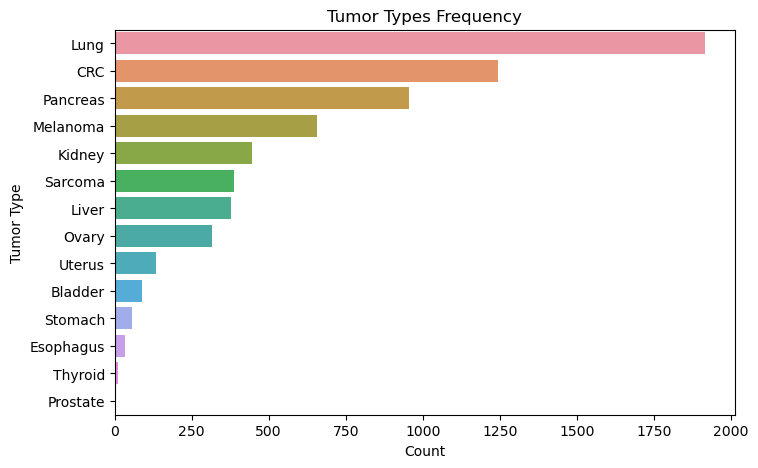

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(y='tumour_type3_y', data=feature_df, order=feature_df['tumour_type3_y'].value_counts().index)
plt.title('Tumor Types Frequency')
plt.xlabel('Count')
plt.ylabel('Tumor Type')
plt.show()

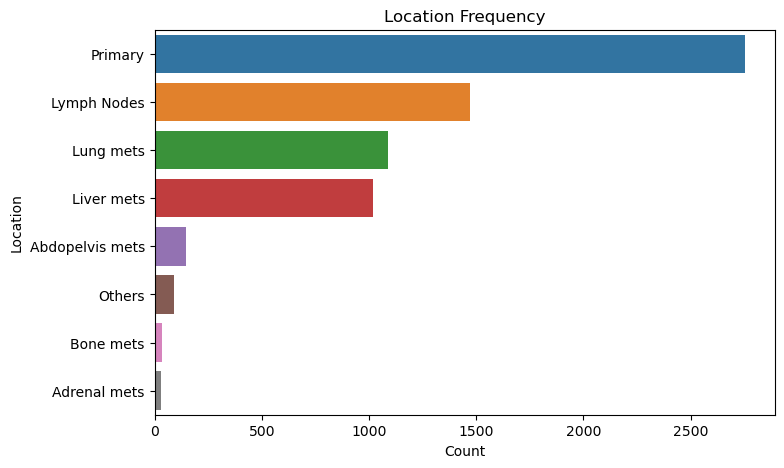

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(y='Location', data=feature_df, order=feature_df['Location'].value_counts().index)
plt.title('Location Frequency')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

## Defining tumor df and y param

In [19]:
x_start = feature_df.columns.get_loc('original_shape_Elongation')
x_end = feature_df.columns.get_loc('lbp-3D-k_ngtdm_Strength')+1

In [20]:
# definition of all tumors df 
all_df = feature_df.dropna(subset='tumour_type3_y')
all_df = all_df.iloc[:, x_start:x_end].fillna(all_df.median(numeric_only=True))


In [21]:
# definition of primary df and y_param 
primary_df = feature_df[feature_df['binary primary tumor'] == 1]
primary_df = primary_df.dropna(subset='tumour_type3_y')
primary_feat_df = primary_df.iloc[:, x_start:x_end].fillna(feature_df.median(numeric_only=True))
primary_outcome_name = 'Tumour_Type'

primary_y_param = primary_df['tumour_type3_y']
primary_lung_y_param = primary_df['binary lung']
primary_CRC_y_param = primary_df['binary CRC']

In [22]:
# used feat_df = all_df 
# y_param = 
patient_level_y_param = feature_df['tumour_type3_y']
lymph_y_param = feature_df['Lymph_type']
lesion_y_param = feature_df['lesion_type']
Location_y_param = feature_df['Location']

## Clustering based on Tumor type:

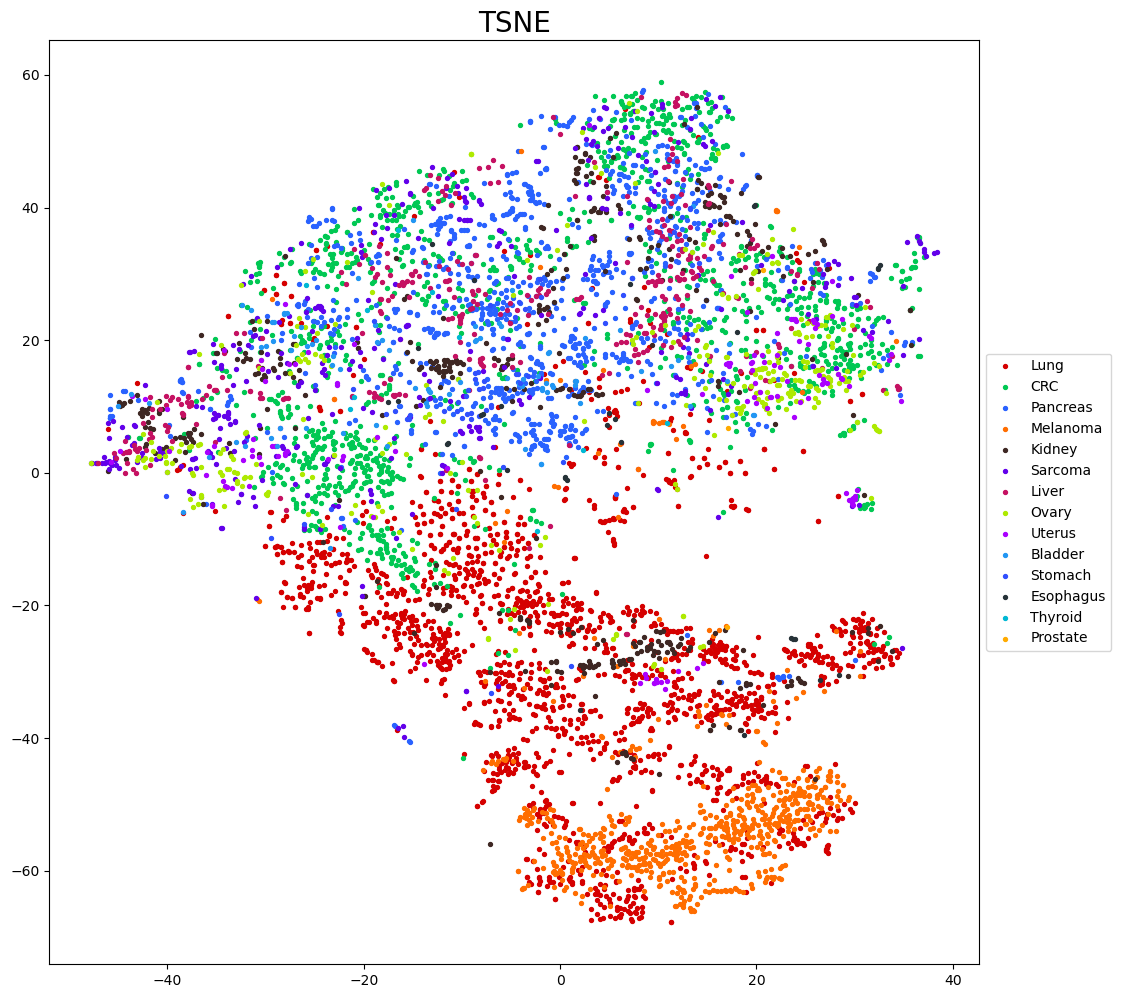

In [25]:
TSNE_maker(feat_df=all_df, y_param=patient_level_y_param, colors=all_colors, s=8)

## Clustering on the 5 most common tumor types

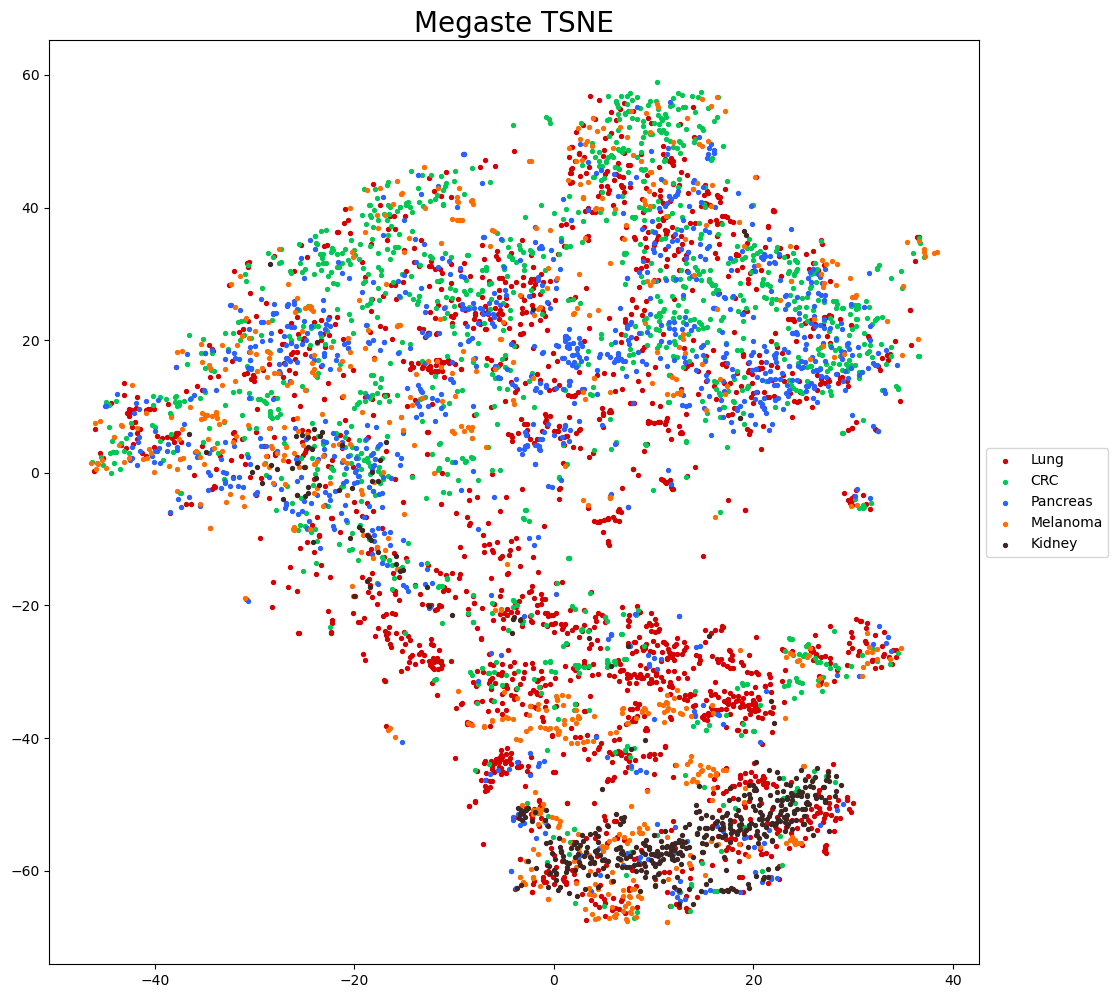

In [26]:
transp_TSNE_maker(feat_df=all_df, lesion=2, tumor_list=['Lung', 'CRC', 'Pancreas', 'Kidney', 'Melanoma'], binary_tumor='none', colors=all_colors, s=8)

## Primary Tumor vs. Metastasis

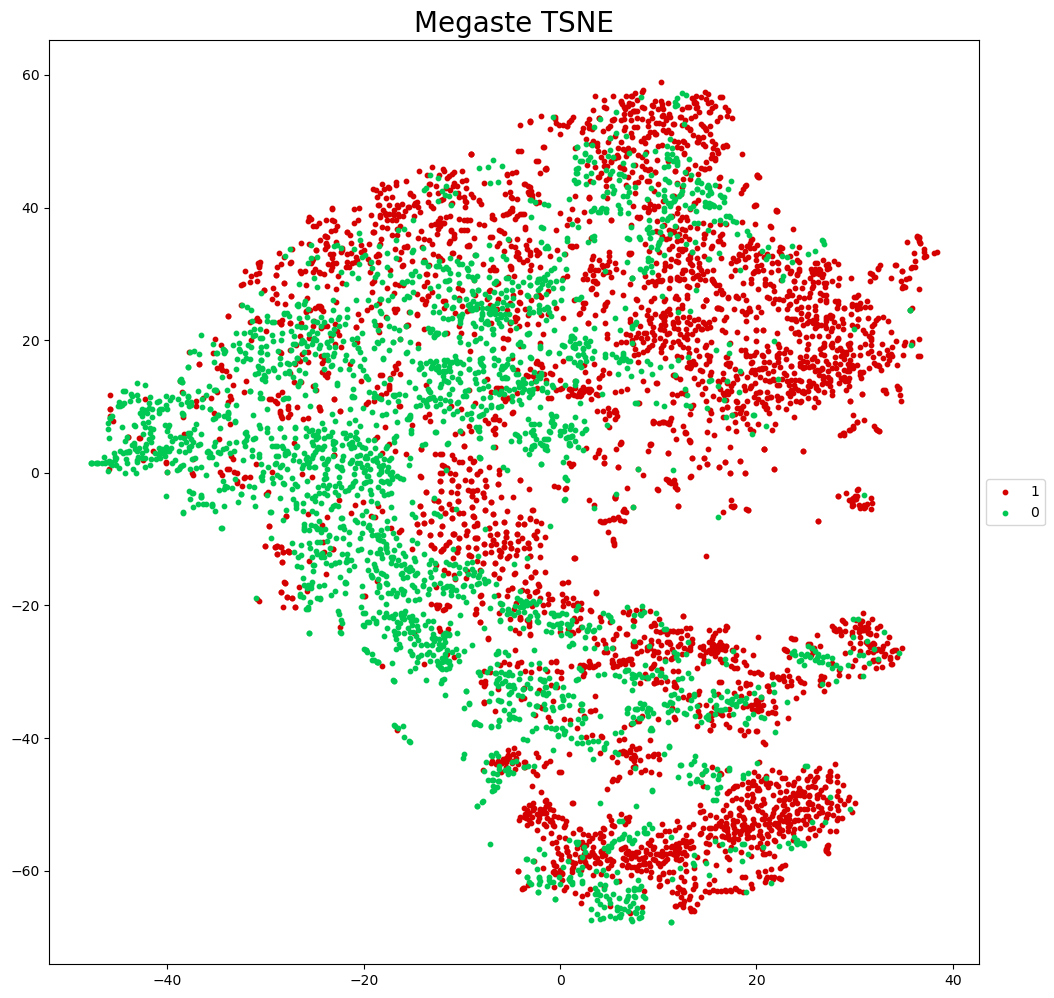

In [27]:
transp_TSNE_maker(feat_df=all_df, lesion=2, tumor_list=['none'], binary_tumor='prim-mets', colors=all_colors, s=10)

## Only primary tumors based on all tumor types

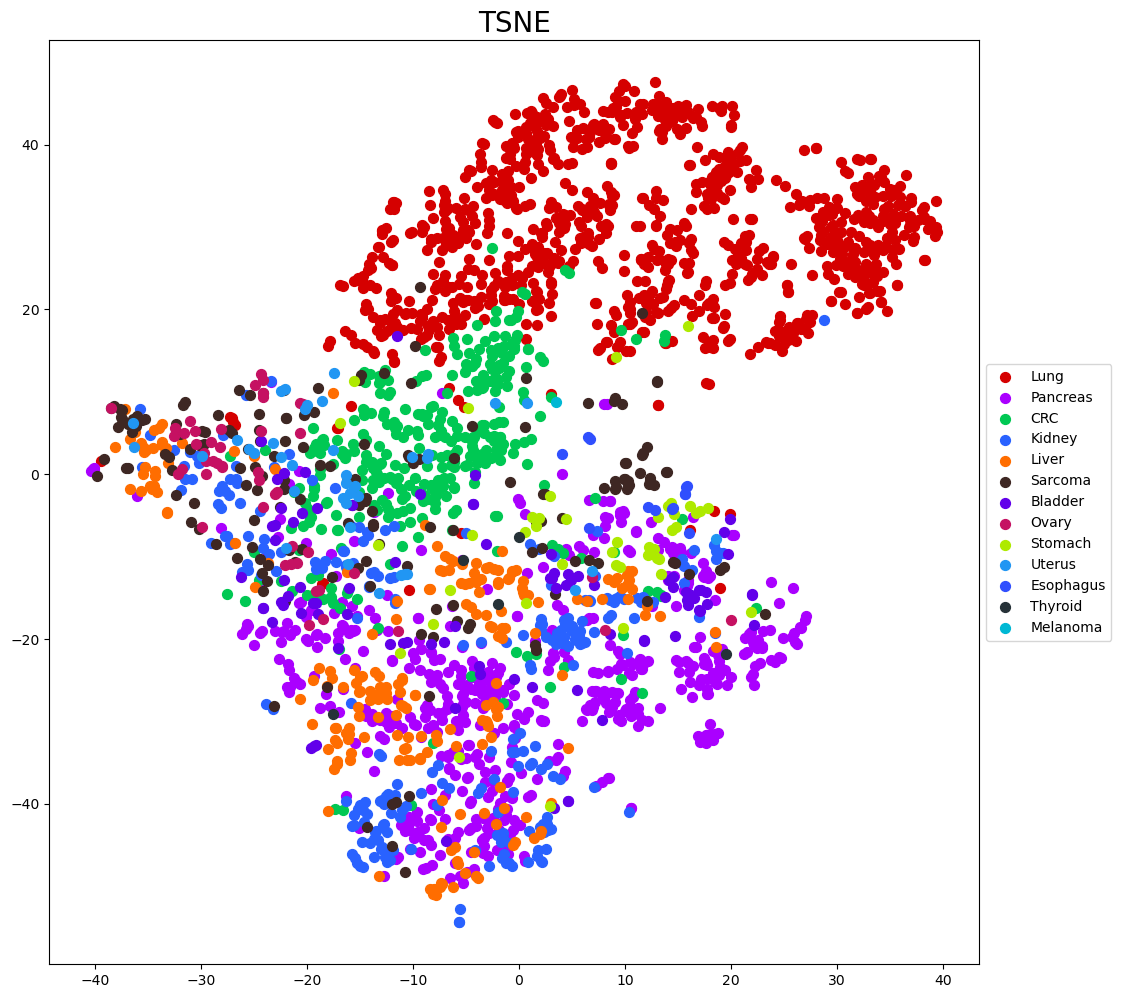

In [32]:
TSNE_maker(feat_df=primary_feat_df, y_param=primary_y_param, colors=all_colors, s=50)

## Only Primary tumors based on lung(1) vs. non-lung tumors(0)

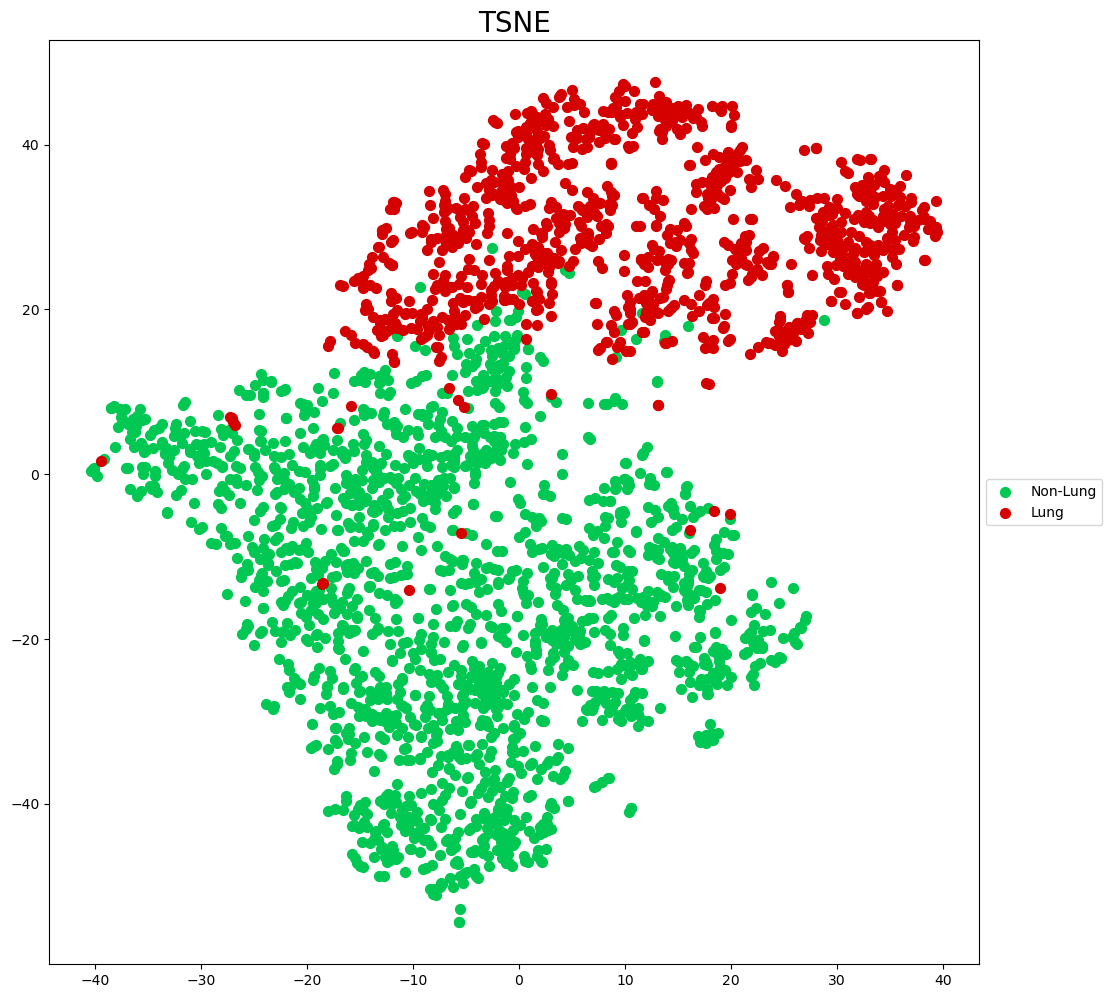

In [43]:
# Step 2.1: Primary - lung vs everything else 
TSNE_maker(feat_df=primary_feat_df, y_param=primary_lung_y_param, colors=colors, s=50)

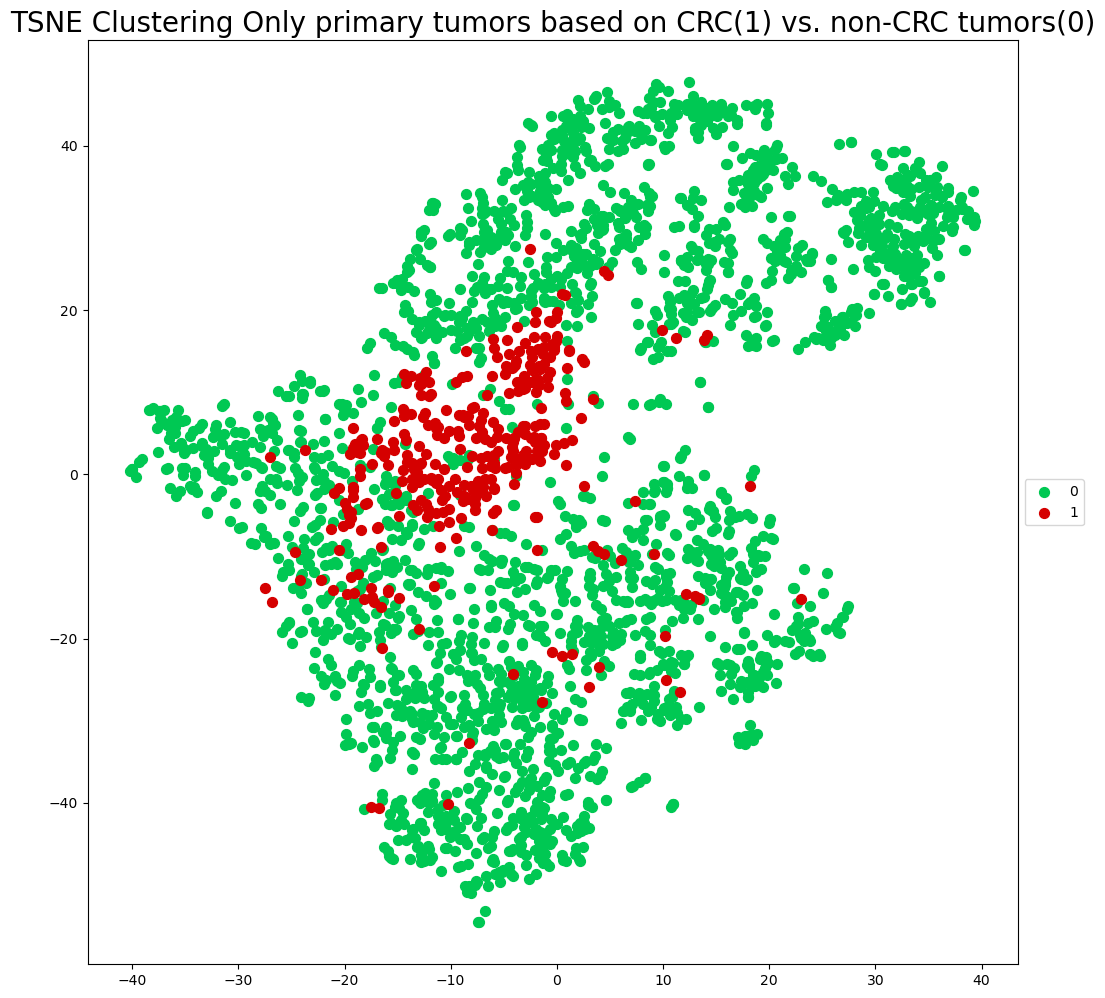

In [25]:
# Step 2.1: Primary - CRC vs everything else 
TSNE_maker(feat_df=primary_feat_df, y_param=primary_CRC_y_param, colors=colors, s=50)

## Clustering based on anatomical location

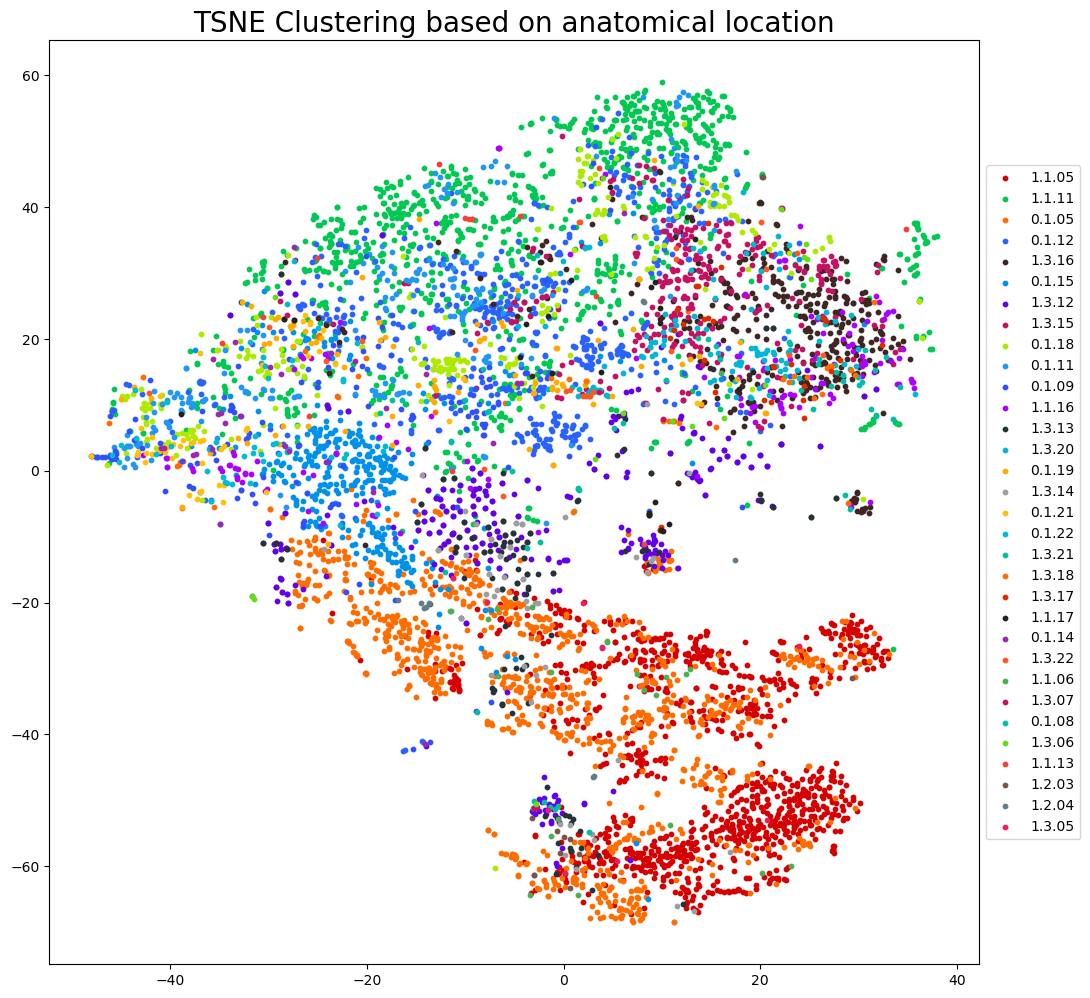

In [27]:
TSNE_maker(feat_df=all_df, y_param=lesion_y_param, colors=all_colors, s=10)

## Clustering of location Lung, Primary vs. Mets

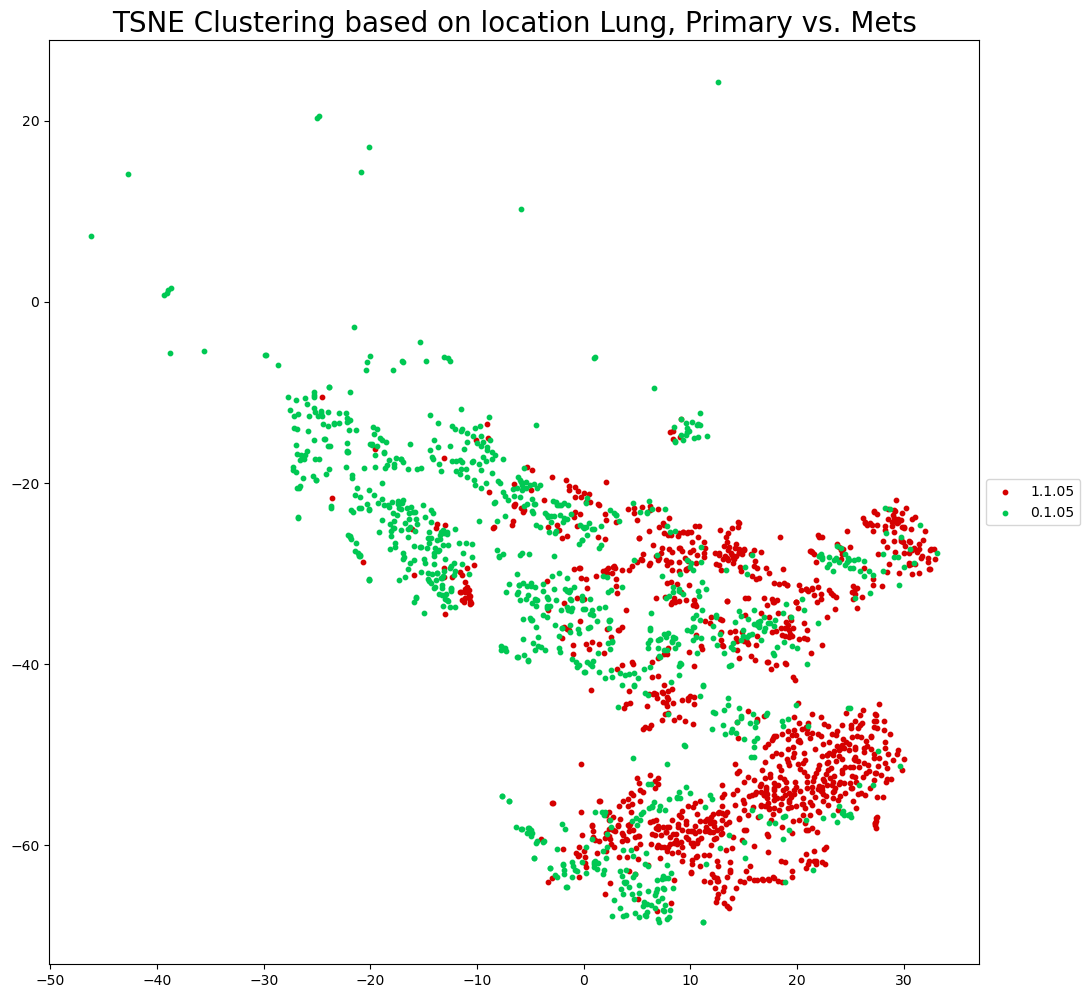

In [24]:
TSNE_maker(feat_df=all_df, y_param=lesion_y_param, colors=all_colors, s=10, subset_values=['0.1.05', '1.1.05'])

# Clustering based on Anatomical Location (Pancancer Naming)

### All lesions

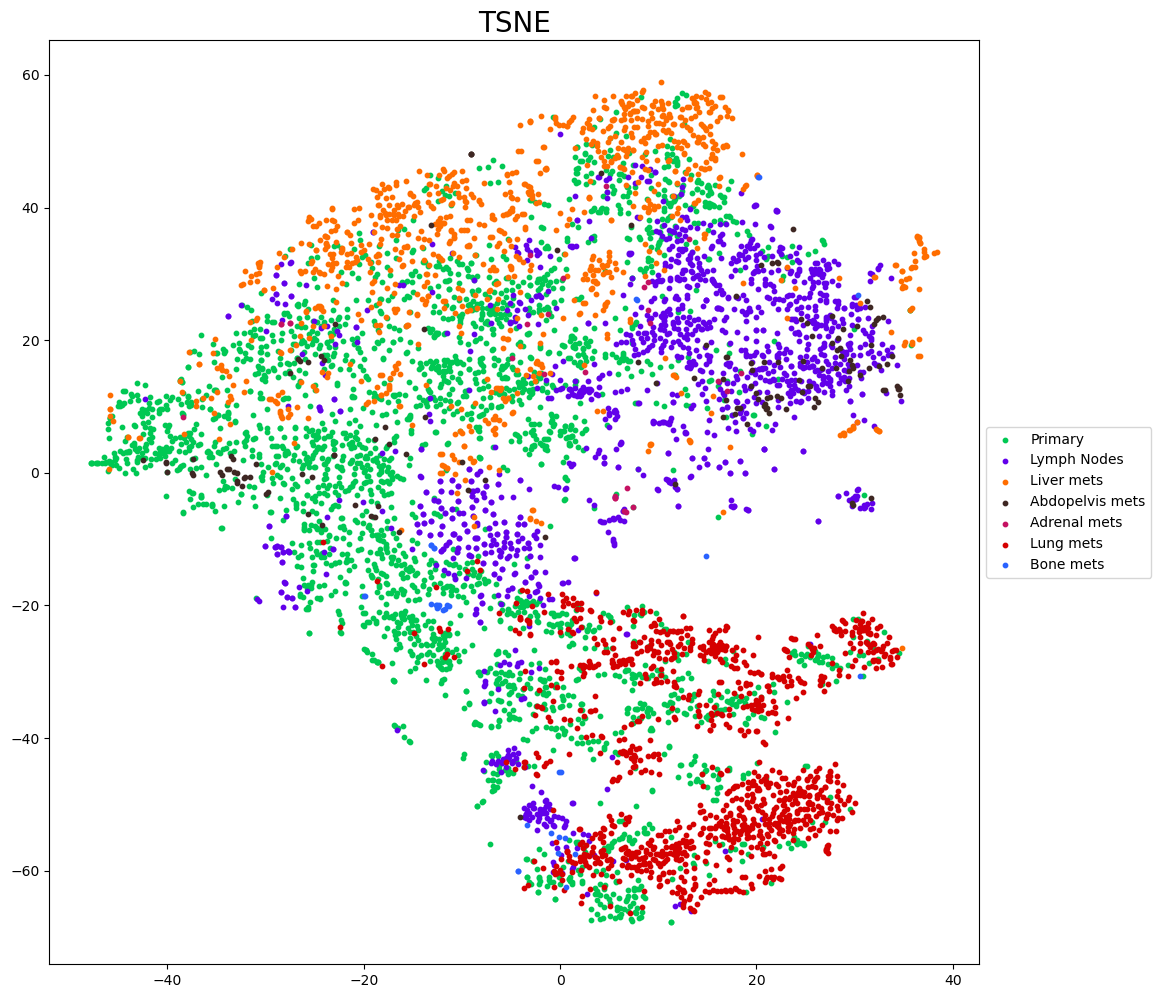

In [68]:
TSNE_maker(feat_df=all_df, y_param=Location_y_param, colors=all_colors, s=10, subset_values=['Primary', 'Lymph Nodes', 'Lung mets', 'Liver mets', 'Bone mets', 'Adrenal mets', 'Abdopelvis mets', 'Brain mets'])

### Only Mets

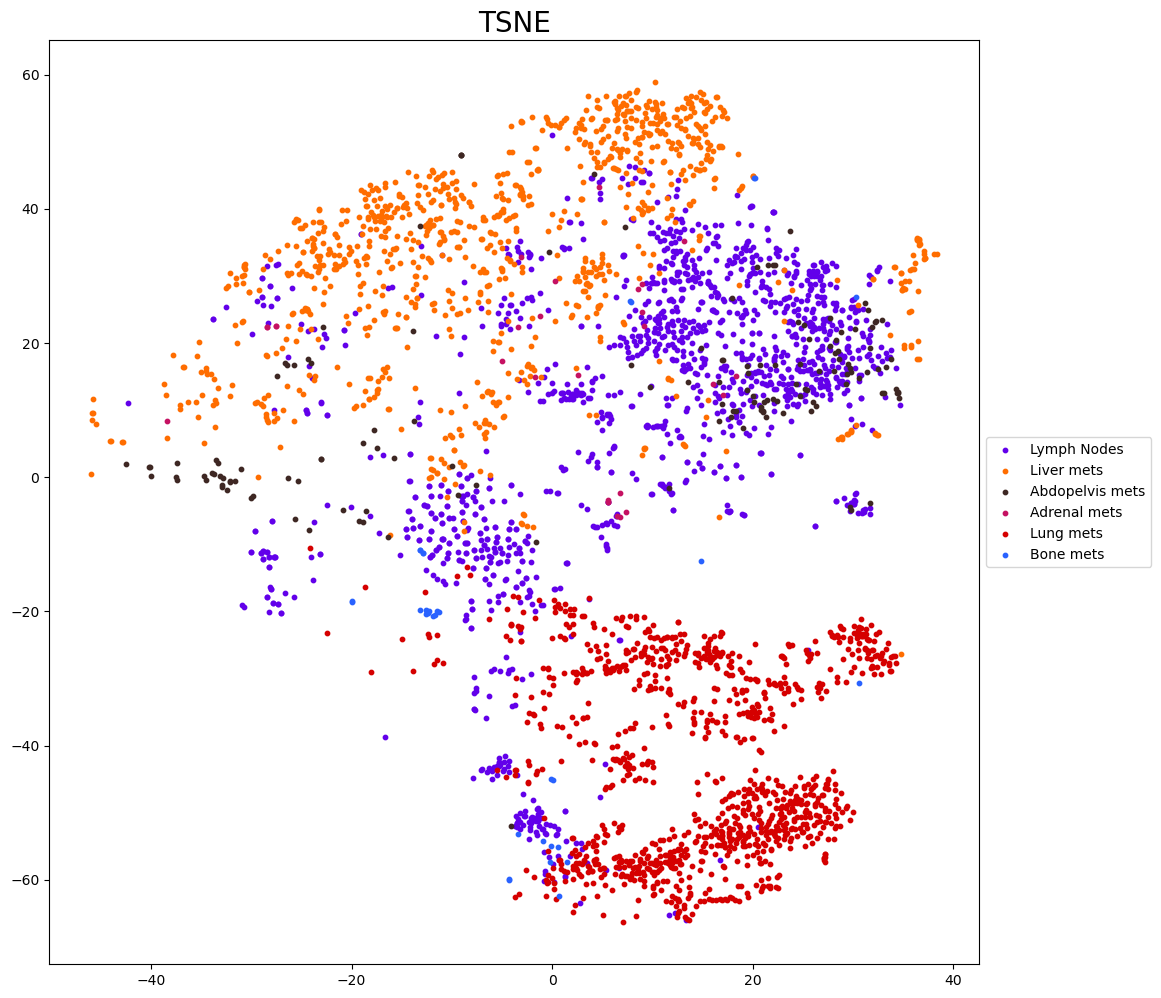

In [69]:
TSNE_maker(feat_df=all_df, y_param=Location_y_param, colors=all_colors, s=10, subset_values=['Lymph Nodes', 'Lung mets', 'Liver mets', 'Bone mets', 'Adrenal mets', 'Abdopelvis mets'])

### All lesions (Excluding lymph Nodes)

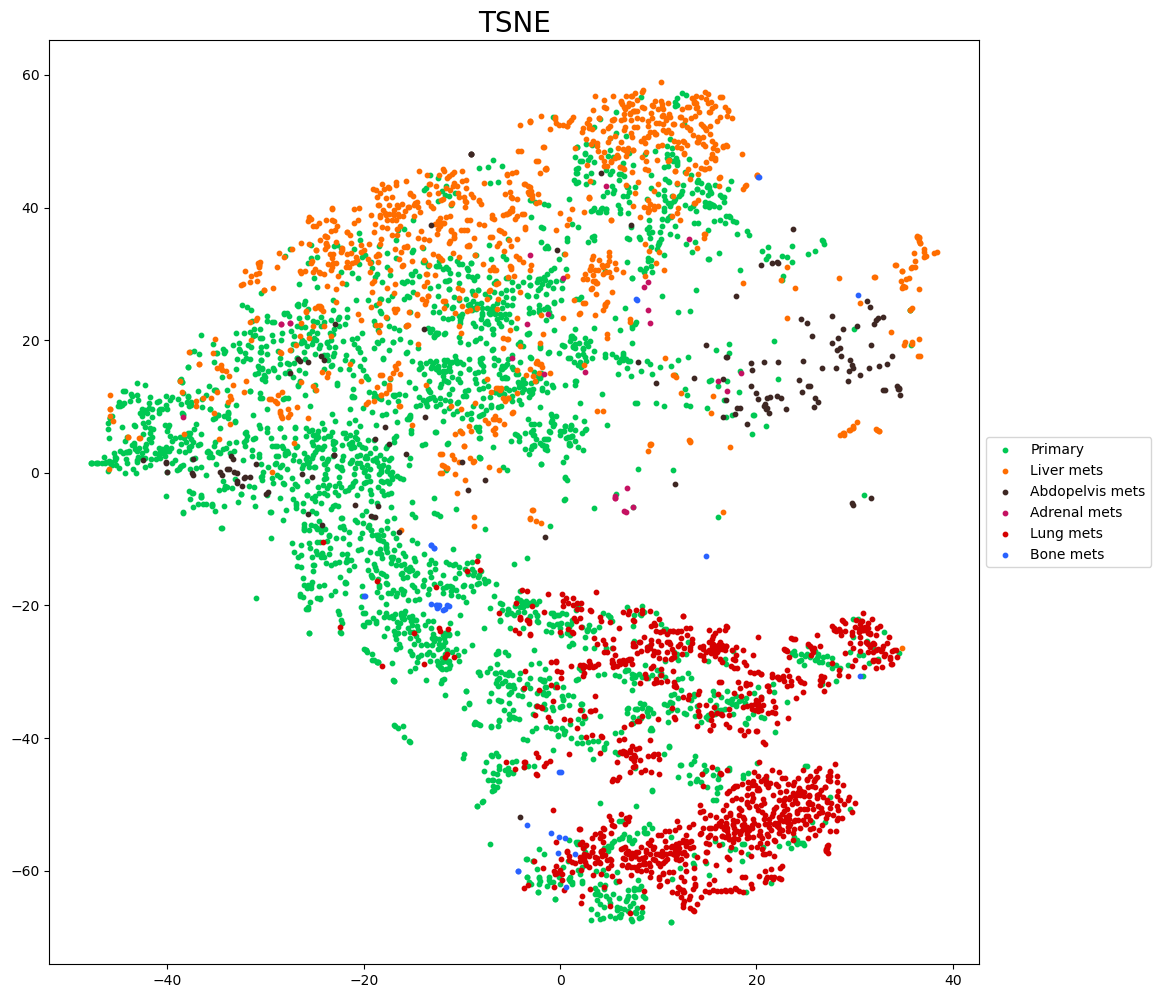

In [70]:
TSNE_maker(feat_df=all_df, y_param=Location_y_param, colors=all_colors, s=10, subset_values=['Primary', 'Lung mets', 'Liver mets', 'Bone mets', 'Adrenal mets', 'Abdopelvis mets'])

### All lesions (Excluding Primary & lymph Nodes)

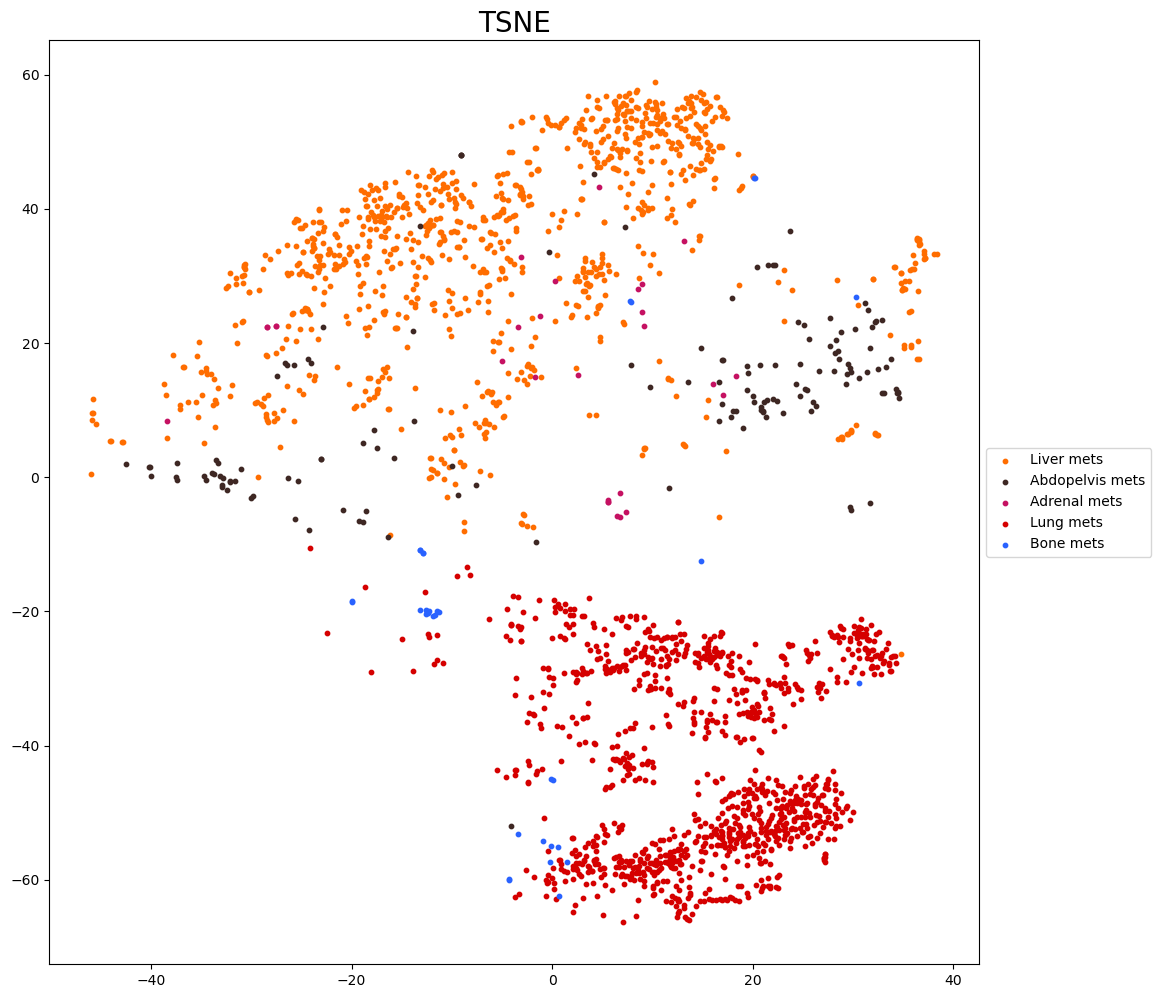

In [71]:
TSNE_maker(feat_df=all_df, y_param=Location_y_param, colors=all_colors, s=10, subset_values=['Lung mets', 'Liver mets', 'Bone mets', 'Adrenal mets', 'Abdopelvis mets'])

## Clustering of Lymph Nodes vs. Non-Lymph Nodes

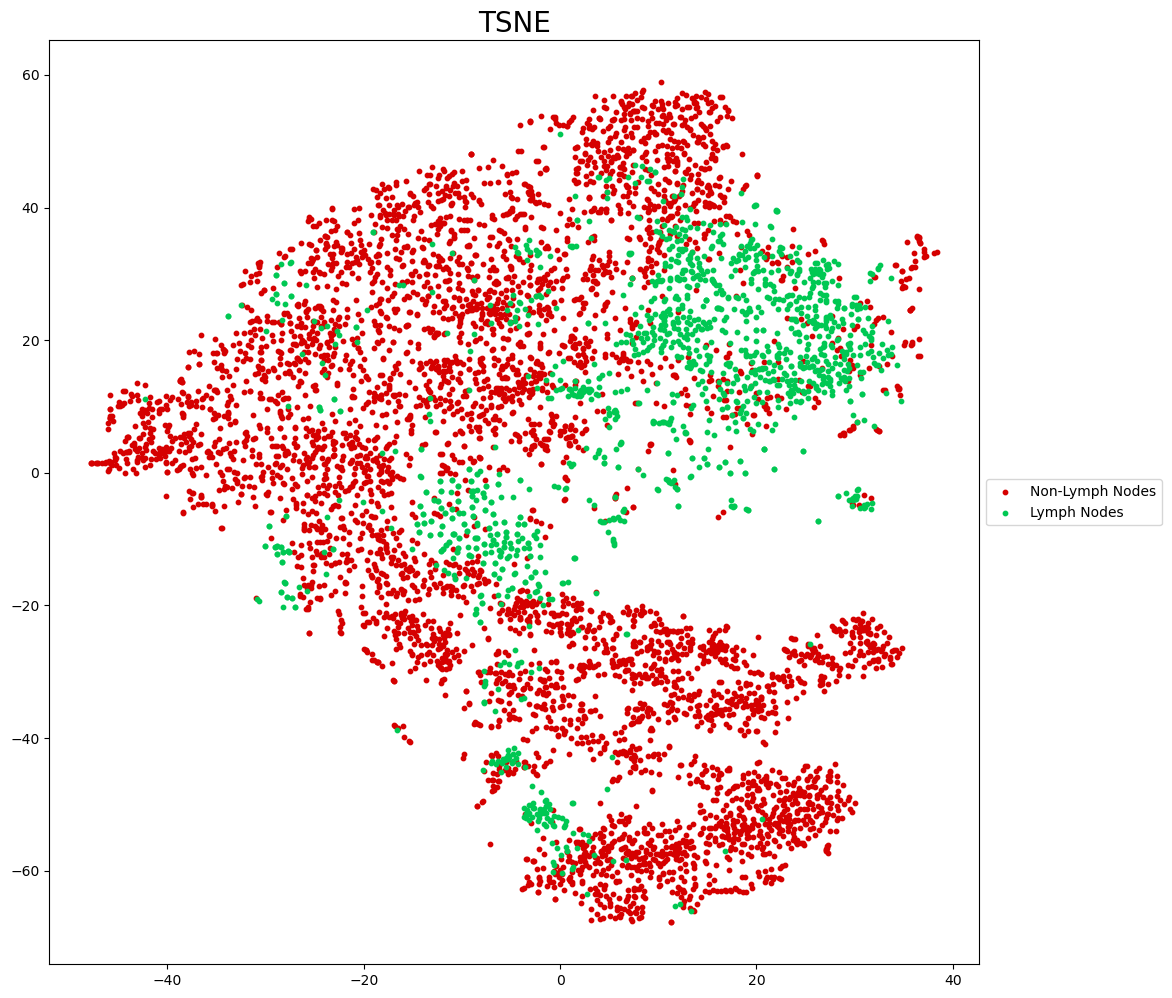

In [41]:
TSNE_maker(feat_df=all_df, y_param=lesion_space_y_param, colors=all_colors, s=10, subset_values=['1','3'])

## Clustering of only Lymph Nodes based on amatomical location

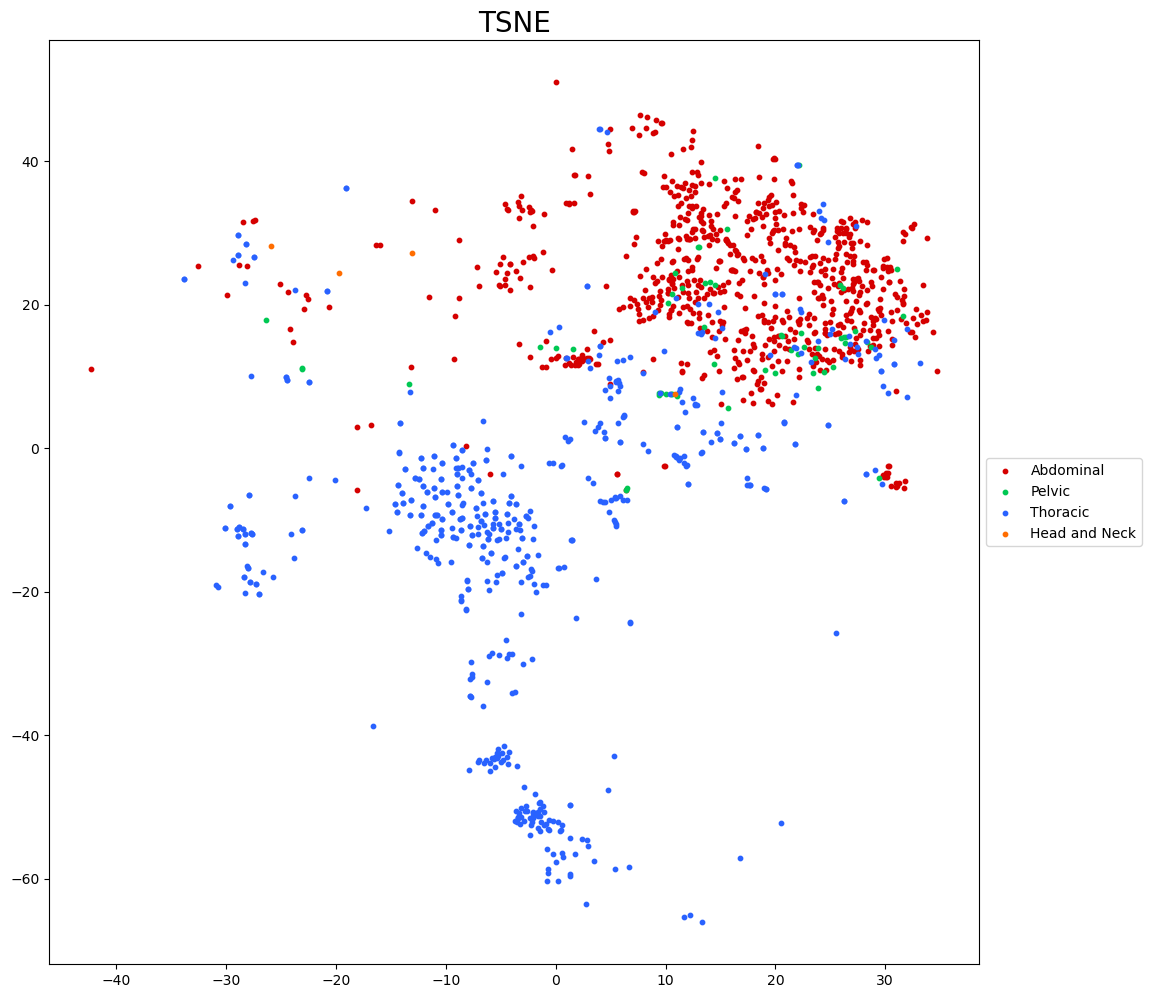

In [88]:
TSNE_maker(feat_df=all_df, y_param=lymph_y_param, Location_to_color=Location_to_color, s=10)